In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
actual_data=pd.read_csv(r"C:\Users\atanu\OneDrive\Desktop\data science assignment\Clustering\east west airway.csv")

In [3]:
actual_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
actual_data.shape

(3999, 12)

In [5]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
data=actual_data.rename(columns={'ID#':'ID','Award?':'Award'})

In [7]:
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
data.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [9]:
data['cc1_miles'].unique()
data['cc2_miles'].unique()
data['cc3_miles'].unique()

array([1, 3, 2, 4, 5], dtype=int64)

In [10]:
#Number of miles earned with Small Business credit card in the past 12 months:
#1 = under 5,000
#2 = 5,000 - 10,000
#3 = 10,001 - 25,000
#4 = 25,001 - 50,000,
#5 = over 50,000

data['cc1_miles']=data['cc1_miles'].replace([1,2,3,4,5],[2500,7500,17500,37500,75000])
data['cc2_miles']=data['cc2_miles'].replace([1,2,3,4,5],[2500,7500,17500,37500,75000])
data['cc3_miles']=data['cc3_miles'].replace([1,2,3,4,5],[2500,7500,17500,37500,75000])

In [11]:
data.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,14970.617654,2591.272818,2661.915479,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,20499.272779,1005.448566,2937.629532,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,2500.000000,2500.000000,2500.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,2500.000000,2500.000000,2500.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,2500.000000,2500.000000,2500.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,17500.000000,2500.000000,2500.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,75000.000000,17500.000000,75000.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [12]:
data.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [13]:
corr=data.corr(numeric_only=True)

<Axes: >

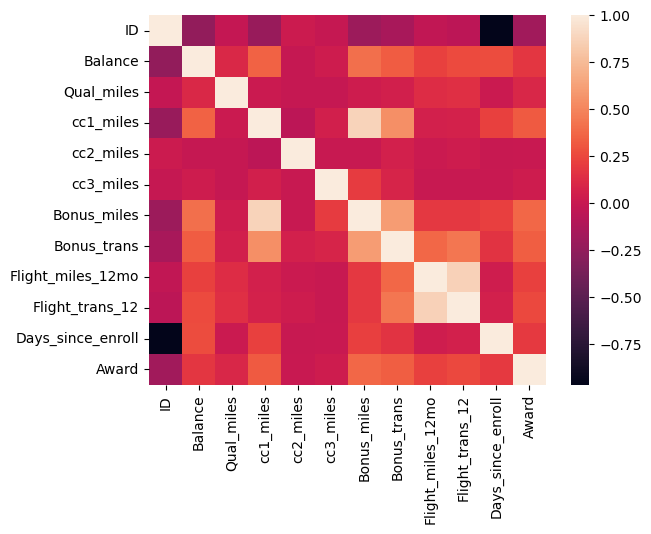

In [14]:
sns.heatmap(corr)

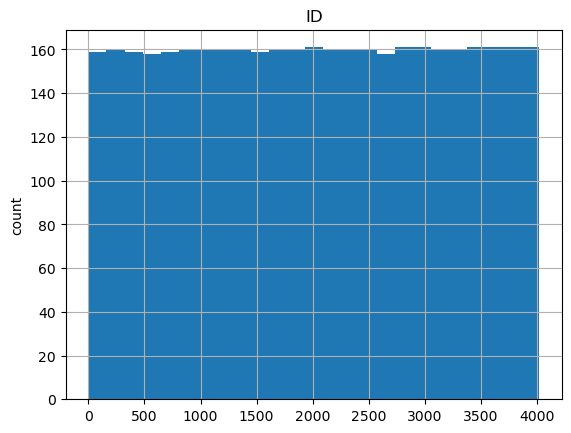

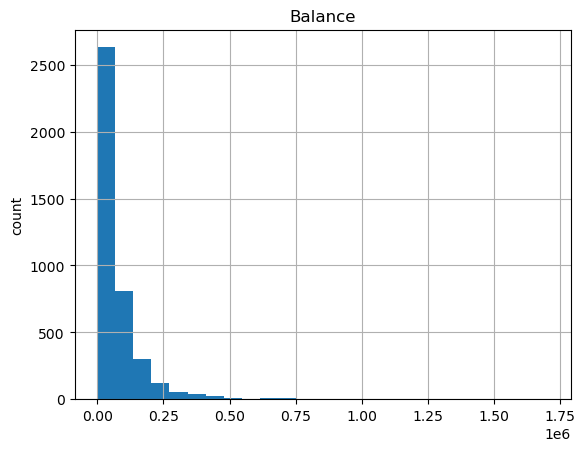

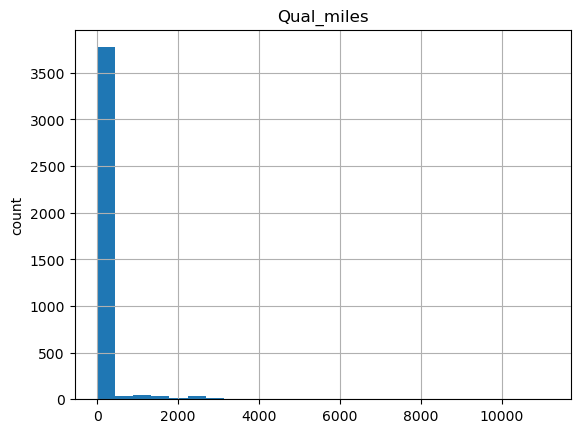

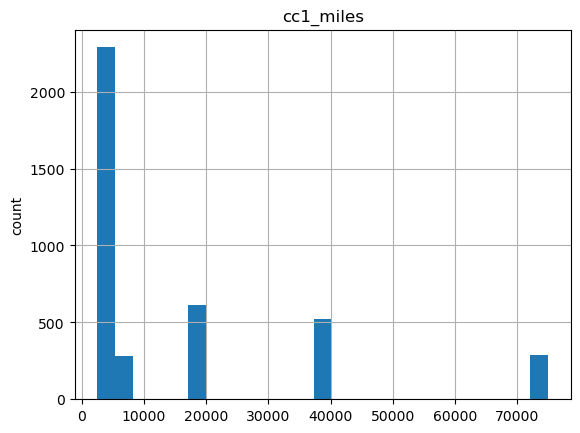

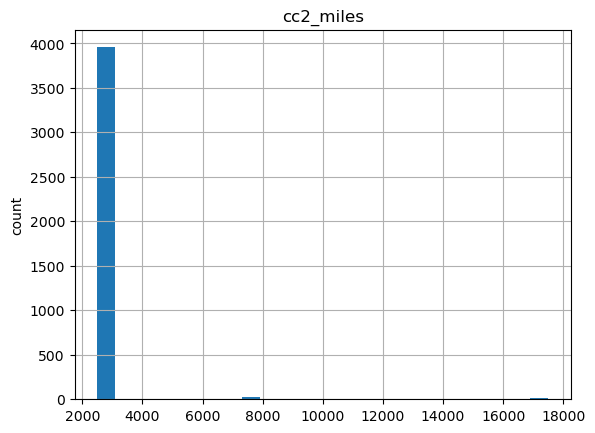

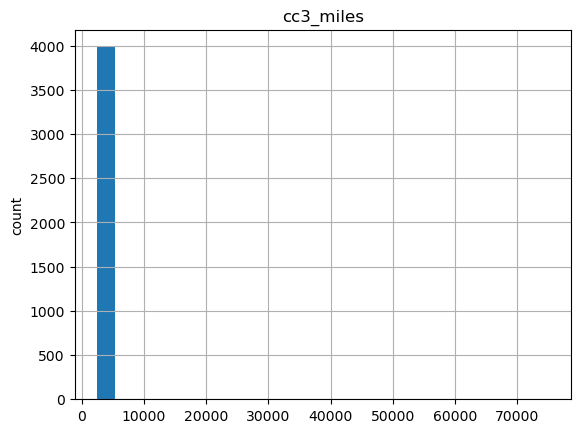

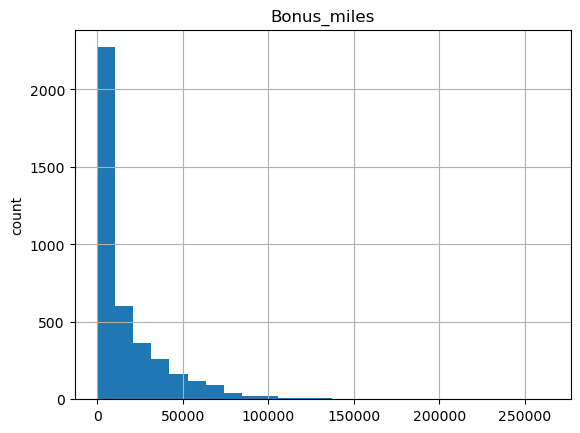

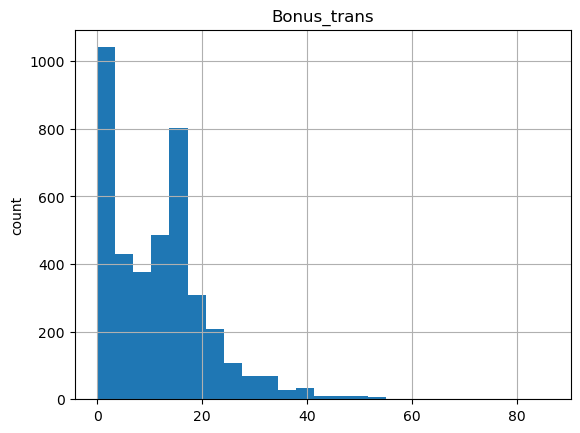

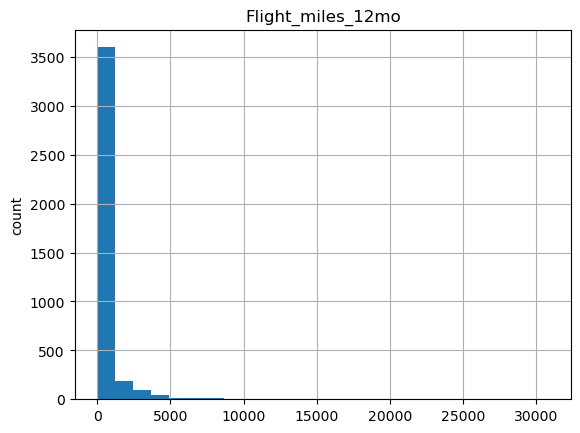

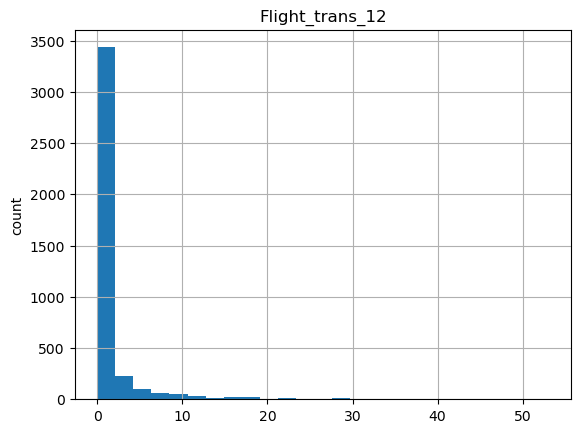

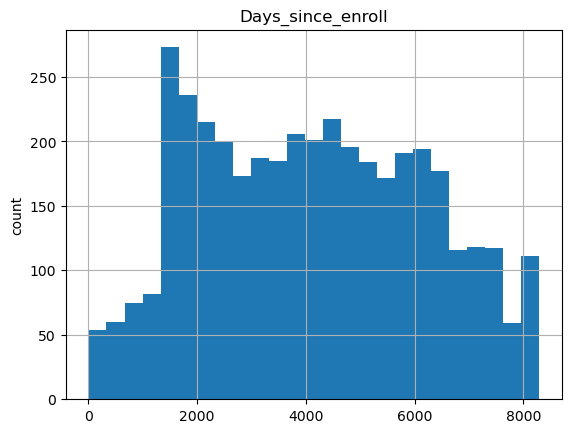

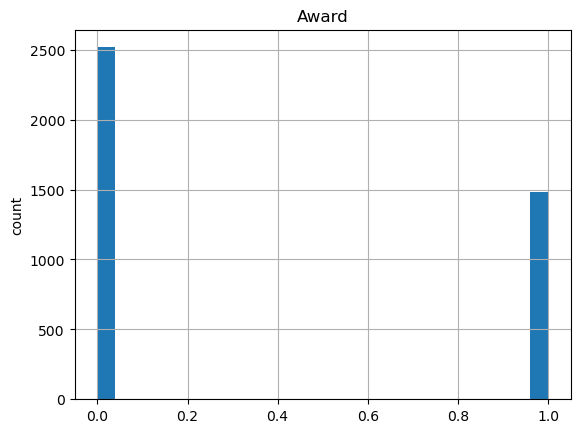

In [15]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

[Text(0.5, 0, 'Award'), Text(0, 0.5, 'Balance')]

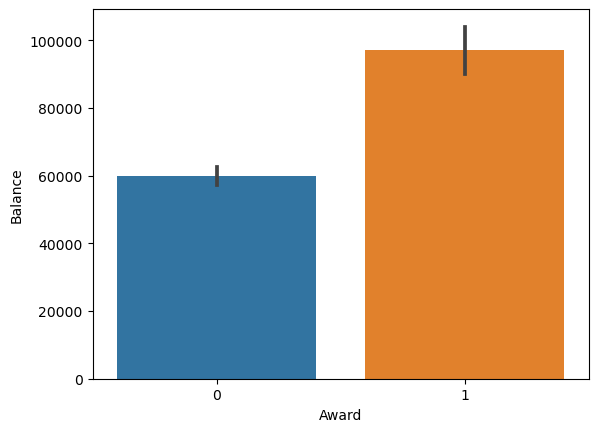

In [16]:
balance=data[['Balance','Award']].sort_values('Balance',ascending=False)
ax=sns.barplot(x='Award',y='Balance',data=balance)
ax.set(xlabel='Award',ylabel='Balance')

<Axes: xlabel='Award'>

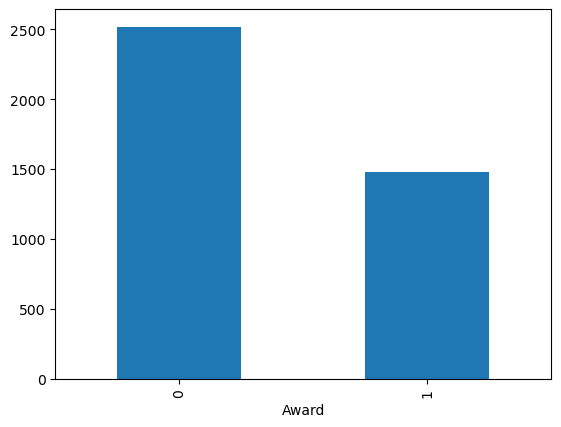

In [17]:
data['Award'].value_counts().plot(kind='bar')

In [18]:
print(data['Award'].value_counts(normalize=True)*100)

Award
0    62.965741
1    37.034259
Name: proportion, dtype: float64


In [19]:
# only 37% people gain the award

# HICHERCHIAL CLUSTERING

In [20]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import AgglomerativeClustering



In [21]:
scaler=MinMaxScaler()
df_norm=scaler.fit_transform(data)

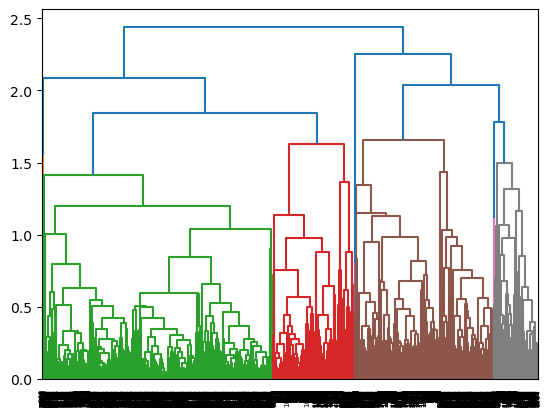

In [22]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [23]:
hc=AgglomerativeClustering(n_clusters=5,linkage='complete')
y_hc=hc.fit_predict(df_norm)

In [24]:
y_hc

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [25]:
set(y_hc)

{0, 1, 2, 3, 4}

In [26]:
data['clusters']=y_hc

In [27]:
data1=data.sort_values('clusters')

In [28]:
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,1,28143,0,2500,2500,2500,174,1,0,0,7000,0,0
1,2,19244,0,2500,2500,2500,215,2,0,0,6968,0,0
2,3,41354,0,2500,2500,2500,4123,4,0,0,7034,0,0
3,4,14776,0,2500,2500,2500,500,1,0,0,6952,0,0
4,5,97752,0,37500,2500,2500,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,2500,2500,2500,8525,4,200,1,1403,1,4
3995,4018,64385,0,2500,2500,2500,981,5,0,0,1395,1,4
3996,4019,73597,0,17500,2500,2500,25447,8,0,0,1402,1,4
3997,4020,54899,0,2500,2500,2500,500,1,500,1,1401,0,0


In [29]:
data.groupby('clusters').agg(['mean']).reset_index()

,clusters,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2172.292148,59839.089677,87.916700,9931.247509,2533.878039,2600.637704,10208.555600,9.124352,226.944599,0.654045,3821.431248,0.0
1,1,1493.166667,144663.545198,265.062147,60296.610169,2500.000000,3559.322034,67024.796610,21.954802,810.974576,2.471751,5059.019774,1.0
2,2,3128.000000,131999.500000,347.000000,20000.000000,2500.000000,2500.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0
3,3,2212.000000,52231.400000,66.666667,2500.000000,17500.000000,2500.000000,20410.466667,18.933333,692.666667,3.200000,4075.533333,0.4
4,4,1819.793196,82070.786929,232.328559,12074.753805,2549.239033,2517.905103,16699.643688,13.581021,799.502238,2.445837,4495.363474,1.0


In [30]:
data.groupby('clusters').agg(['count'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,count,count,count,count,count,count,count,count,count,count,count,count
clusters,,,,,,,,,,,,
0,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
1,354,354,354,354,354,354,354,354,354,354,354,354
2,4,4,4,4,4,4,4,4,4,4,4,4
3,15,15,15,15,15,15,15,15,15,15,15,15
4,1117,1117,1117,1117,1117,1117,1117,1117,1117,1117,1117,1117


In [31]:
from sklearn.metrics import silhouette_score
score=silhouette_score(df_norm,y_hc)

In [32]:
score

0.44665447806505926

# KMEANS

In [33]:
x=data.iloc[:,1:11].values

In [34]:
#st_scaler=StandardScaler()
#std_data=st_scaler.fit_transform(x)

C:\Users\atanu\.ipython\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\atanu\.ipython\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\atanu\.ipython\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\atanu\.ipython\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

Text(0.5, 1.0, 'Elbow graph')

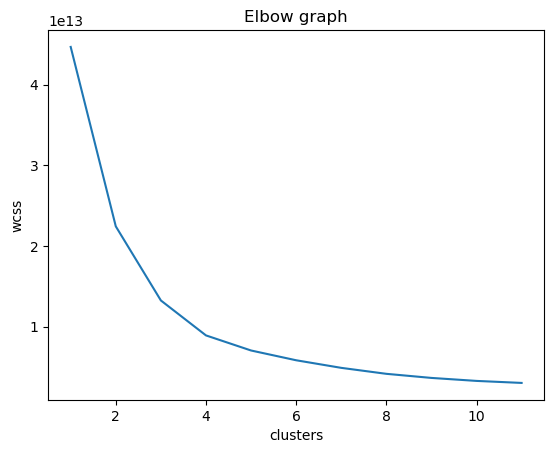

In [35]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,12):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,12),wcss)
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.title('Elbow graph')

In [36]:
kmeans=KMeans(4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

C:\Users\atanu\.ipython\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
data['clusters']=y_kmeans

In [39]:
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,1,28143,0,2500,2500,2500,174,1,0,0,7000,0,0
1,2,19244,0,2500,2500,2500,215,2,0,0,6968,0,0
2,3,41354,0,2500,2500,2500,4123,4,0,0,7034,0,0
3,4,14776,0,2500,2500,2500,500,1,0,0,6952,0,0
4,5,97752,0,37500,2500,2500,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,2500,2500,2500,8525,4,200,1,1403,1,0
3995,4018,64385,0,2500,2500,2500,981,5,0,0,1395,1,0
3996,4019,73597,0,17500,2500,2500,25447,8,0,0,1402,1,0
3997,4020,54899,0,2500,2500,2500,500,1,500,1,1401,0,0


In [40]:
data.groupby('clusters').agg(['mean']).reset_index()

,clusters,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2197.793885,30635.471223,100.981295,8553.057554,2606.115108,2577.338129,9567.453957,9.165468,290.040288,0.881655,3780.930935,0.319424
1,1,1239.203209,321926.684492,333.641711,33663.101604,2580.213904,2500.000000,43958.197861,18.577540,1271.213904,3.860963,5542.983957,0.625668
2,2,863.423077,842320.230769,512.692308,39519.230769,2500.000000,3846.153846,57797.192308,22.730769,1845.884615,6.961538,6463.000000,0.846154
3,3,1683.117296,126306.643141,218.553678,28595.924453,2554.671968,2895.129225,32049.510934,16.750497,743.281312,2.126243,4726.197813,0.451292


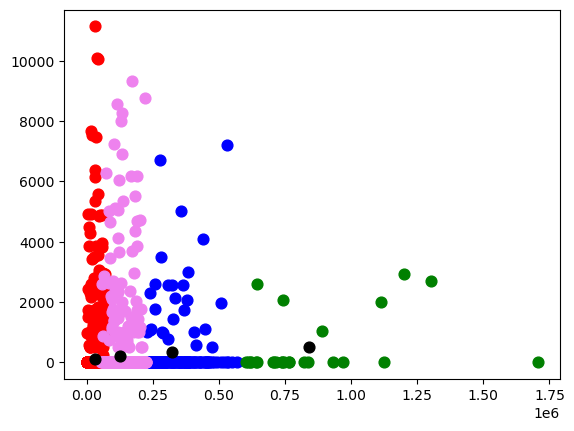

In [41]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=60,c="red",label='cluster1')#s= sample
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=60,c="blue",label='cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=60,c="green",label='cluster3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=60,c="violet",label='cluster4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=60,c="yellow",label='cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=60,c="black",label='centroids')

In [42]:
score=silhouette_score(x,y_kmeans)

In [43]:
score

0.5647983605825464

# DBSCAN

In [62]:
st_scaler=StandardScaler()
std_df=st_scaler.fit_transform(x)

[[0.         0.11184685 0.12034246 ... 0.15349686 0.15881189 0.16026629]
 [0.         0.11406276 0.11437601 ... 0.16921218 0.1921006  0.21071895]
 [0.         0.16540223 0.18885387 ... 0.25910823 0.29632823 0.29785529]
 ...
 [0.         0.16614779 0.28024323 ... 0.59813199 0.60164752 0.60253244]
 [0.         0.25725534 0.27167409 ... 0.43281013 0.44722732 0.4525372 ]
 [0.         0.00270574 0.0112955  ... 0.06195028 0.06384821 0.08663803]]


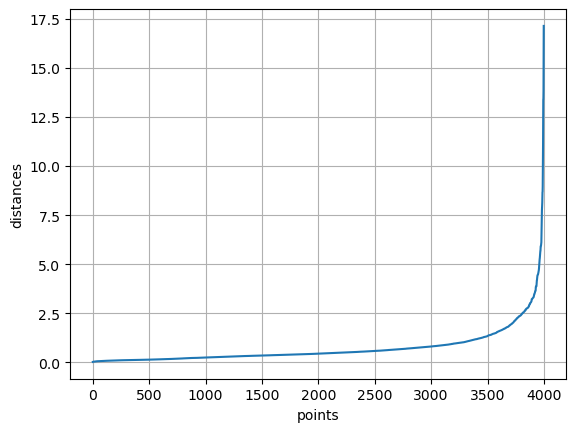

In [63]:
from sklearn.neighbors import NearestNeighbors

neighbors=NearestNeighbors(n_neighbors=10)
neighbors=neighbors.fit(std_df)

# distance
distance,indices=neighbors.kneighbors(std_df)
distances=np.sort(distance[:,9],axis=0)
print(distance)

#plot
plt.plot(distances)
plt.xlabel('points')
plt.ylabel('distances')
plt.grid()

In [64]:
# knee locator
!pip install kneed

In [74]:
from kneed import KneeLocator
i=np.arange(len(distances))

knee=KneeLocator(i,distances, S=1,curve='convex',direction='increasing')
print(distances[knee.knee])

3.8735932376354385


In [104]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3.8,min_samples=8)
dbscan.fit(std_df)
#cluster=dbscan.fit_predict(std_df)

DBSCAN(eps=3.8, min_samples=8)

In [105]:
data['db_clusters']=pd.DataFrame(dbscan.labels_,columns=['db_clusters'])

In [106]:
data.groupby('db_clusters').agg(['mean']).reset_index()

,db_clusters,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1562.666667,337105.047619,1095.595238,36607.142857,3095.238095,17559.523810,83747.619048,33.428571,5023.071429,13.166667,5059.023810,0.833333,1.809524
1,0,2017.076589,71016.529742,135.383967,14855.756957,2500.000000,2503.829461,16457.138882,11.324738,412.877457,1.249681,4110.439877,0.365586,0.808782
2,1,2154.214286,45781.714286,0.000000,2500.000000,17500.000000,2500.000000,20147.571429,16.928571,410.000000,1.714286,4137.642857,0.357143,0.428571
3,2,2330.115385,52331.000000,0.000000,4038.461538,7500.000000,2500.000000,11544.653846,15.230769,223.576923,0.807692,3812.307692,0.346154,0.269231


In [107]:
data[data['db_clusters']==-1]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters,db_clusters
8,9,443003,0,17500,7500,2500,1753,43,3850,12,6948,1,1,-1
106,109,96627,1182,2500,2500,17500,49059,26,2300,9,6738,1,3,-1
151,154,930410,0,75000,2500,2500,211284,18,2250,6,7640,1,2,-1
190,194,123516,0,75000,2500,2500,240544,31,500,2,7507,1,3,-1
220,224,1302051,2706,75000,2500,2500,90653,32,3050,7,7467,1,2,-1
275,279,1704838,0,2500,2500,2500,17108,32,4823,23,7283,1,2,-1
380,385,377252,0,75000,2500,2500,230629,30,6393,13,6996,1,1,-1
384,389,28193,0,75000,2500,37500,103456,32,0,0,6980,1,0,-1
410,416,620498,0,75000,2500,2500,25395,53,1750,14,8296,1,2,-1
420,426,529886,7210,2500,2500,2500,23866,26,7741,15,8296,1,1,-1


In [111]:
db_score=silhouette_score(std_df,dbscan.labels_)

In [112]:
db_score

0.47056863077609823

In [114]:
# silhouette score of hiercial clustering is 44.66%
# silhouette score of kmeans clustering is 56.47%
# silhouette score of dbscan clustering is 47.05%